# Indonesian Salary by Region Analysis

## Importing Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker as mticker
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Indonesian Salary by Region (1997-2022).csv')

In [4]:
df.head()

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REGION  870 non-null    object
 1   SALARY  870 non-null    int64 
 2   YEAR    870 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.5+ KB


In [6]:
df.isna().sum()

REGION    0
SALARY    0
YEAR      0
dtype: int64

In [7]:
df.duplicated().sum()

0

good, everything was clear except the government issues.

In [8]:
print(len(df['REGION'].unique()))

35


In [9]:
df[df['REGION'] == 'INDONESIA']

,REGION,SALARY,YEAR
27,INDONESIA,135000,1997
59,INDONESIA,150900,1998
91,INDONESIA,175400,1999
123,INDONESIA,216500,2000
155,INDONESIA,290500,2001
187,INDONESIA,362700,2002
219,INDONESIA,414700,2003
251,INDONESIA,458500,2004
283,INDONESIA,507697,2005
317,INDONESIA,602702,2006


we all know that indonesia is a country

In [10]:
df = df[df['REGION'] != 'INDONESIA']

## Top 5 Highest and Fewest Salaryn by Region

let's see what's the most and the fewest salary of all regions

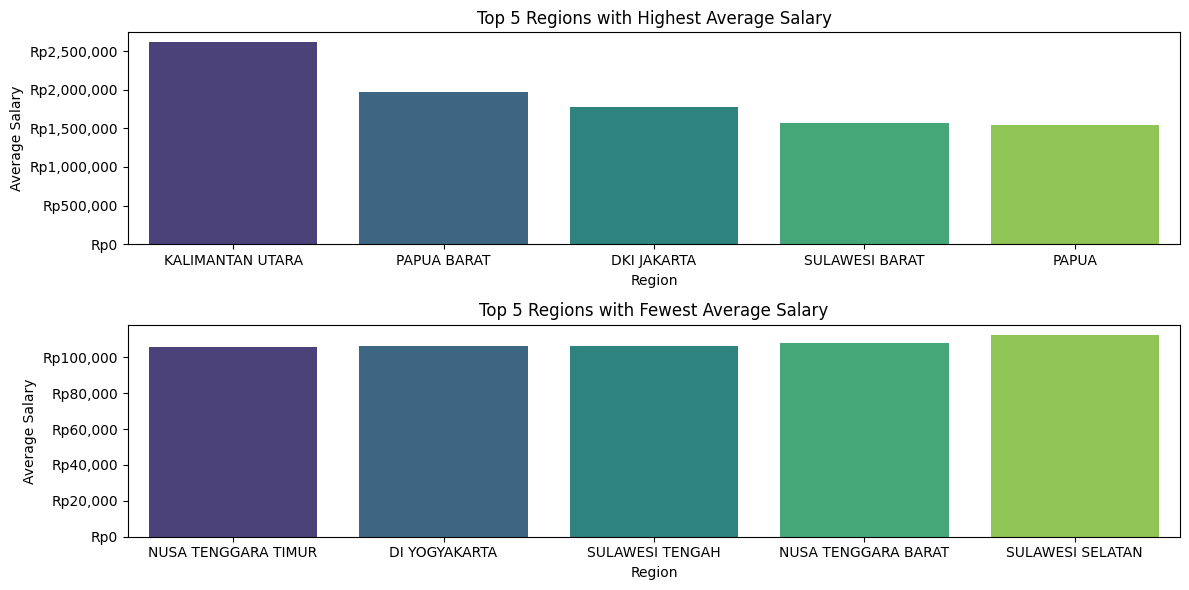

In [11]:
top_5_region_salary = df.groupby('REGION', as_index=False)['SALARY'].mean()
top_5_region_salary = top_5_region_salary.nlargest(5, 'SALARY')
bottom_5_salary = df.groupby('REGION', as_index=False)['SALARY'].mean()
bottom_5_salary = df.nsmallest(5, 'SALARY')

fig, ax = plt.subplots(2,1, figsize=(12, 6))
sns.barplot(x='REGION', y='SALARY', data=top_5_region_salary, ax=ax[0], palette='viridis')
ax[0].set_title('Top 5 Regions with Highest Average Salary')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Average Salary') 
ax[0].yaxis.set_major_formatter(mticker.StrMethodFormatter('Rp{x:,.0f}'))

sns.barplot(x='REGION', y='SALARY', data=bottom_5_salary, ax=ax[1], palette='viridis')
ax[1].set_title('Top 5 Regions with Fewest Average Salary')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Average Salary') 
ax[1].yaxis.set_major_formatter(mticker.StrMethodFormatter('Rp{x:,.0f}'))

plt.tight_layout()
plt.show()

As we can see from the first graph, **Kalimantan Utara** has the highest average salary (calculated as total earnings divided by the number of years from 2000-2022), followed by Papua Barat, and then DKI Jakarta. This might seem surprising because DKI Jakarta is widely known for having the highest UMR (Regional Minimum Wage) in Indonesia, averaging around 5 million rupiah.

The discrepancy arises because:
1.  **UMR is a minimum wage benchmark**, while the "Average Salary" in this graph represents the **cumulative average of salaries over more than two decades (2000-2022)**.
2.  Kalimantan Utara, with its significant natural resources (e.g., mining, oil & gas), likely experienced substantial high-paying jobs and economic activity during this period. These high earnings, especially from a potentially smaller workforce in specific lucrative sectors, could significantly elevate the long-term annual average.
3.  In contrast, while Jakarta's UMR is high, its vast and diverse economy includes a large population with various income levels, which might dilute its overall average when viewed over a multi-year period compared to a resource-rich region.

While the fewest average salary, these regions are East Nusa Tenggara, followed by DI Yogyakarta, Central Sulawesi, West Nusa Tenggara, and South Sulawesi. All of these regions show average salaries in the range above Rp 100,000, indicating that the average salaries in these regions are relatively lower compared to other provinces in Indonesia.

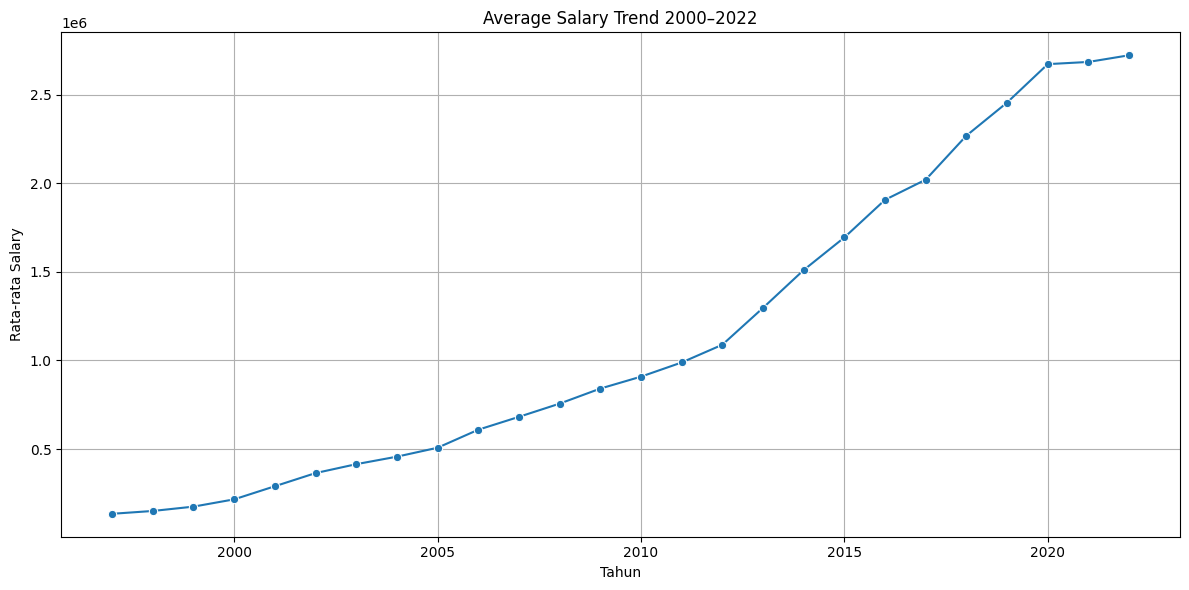

In [12]:
avg_salary_per_year = df.groupby('YEAR', as_index=False)['SALARY'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_salary_per_year, x='YEAR', y='SALARY', marker='o')
plt.title('Average Salary Trend 2000–2022')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

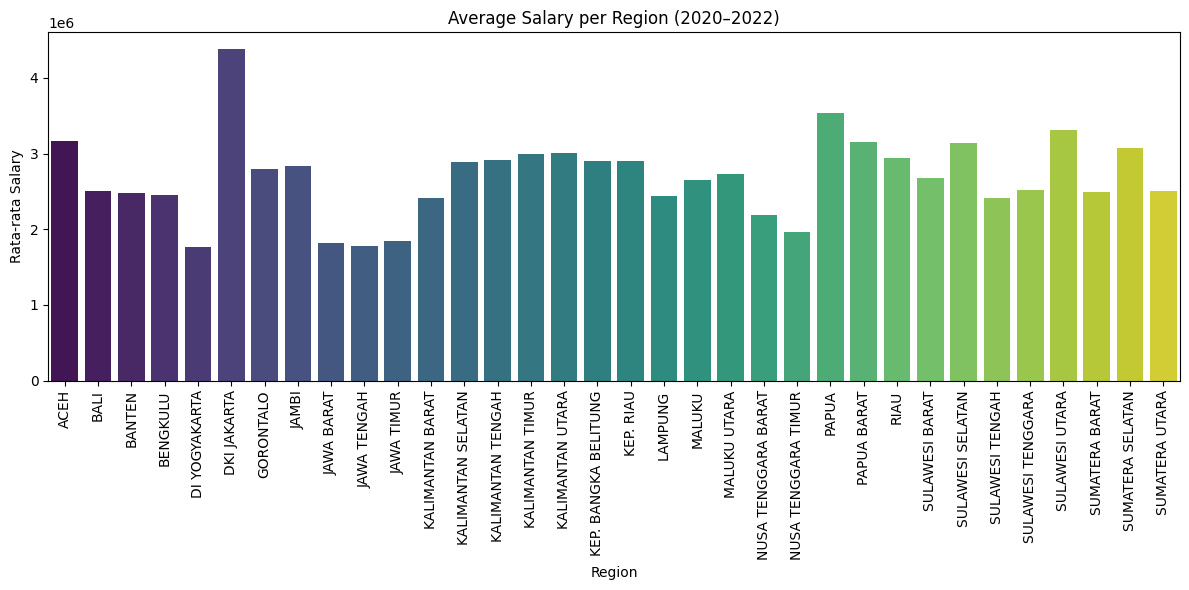

In [13]:
year_filtered = df[df['YEAR'] >= 2020]
year_filtered = year_filtered.groupby('REGION', as_index=False)['SALARY'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(data=year_filtered, x='REGION', y='SALARY', palette='viridis')
plt.title('Average Salary per Region (2020–2022)')   
plt.xlabel('Region')
plt.ylabel('Rata-rata Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The graph “Average Salary per Region (2020-2022)” better reflects the current salary conditions and highlights DKI Jakarta's position as the region with the highest average salary in the last three years. This is most likely driven by its status as the capital city and a growing national economic center, with higher wage standards and living costs compared to other provinces.

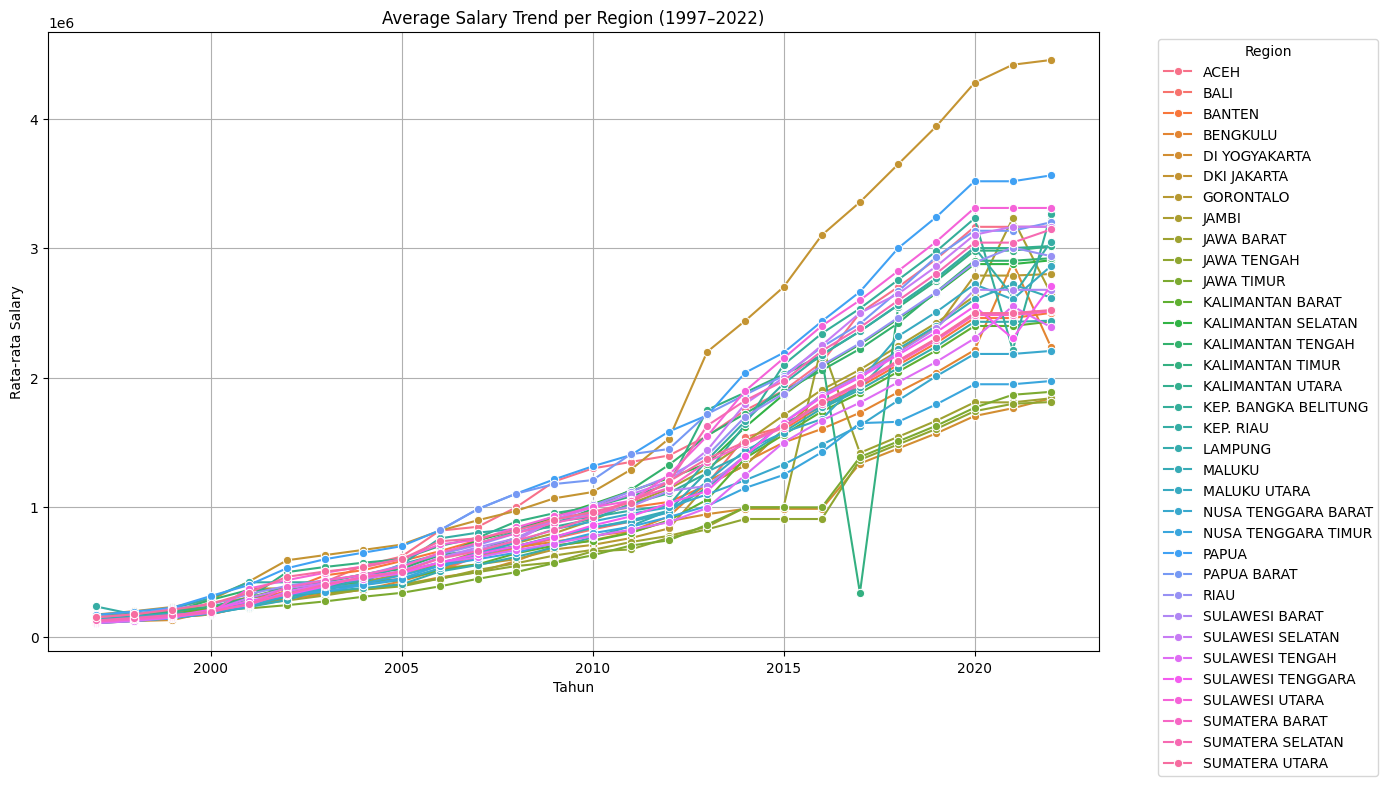

In [14]:
region_year = df.groupby(['REGION', 'YEAR'], as_index=False)['SALARY'].mean()
plt.figure(figsize=(14, 8))
sns.lineplot(data=region_year, x='YEAR', y='SALARY', hue='REGION', marker='o')
plt.title('Average Salary Trend per Region (1997–2022)')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Salary')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

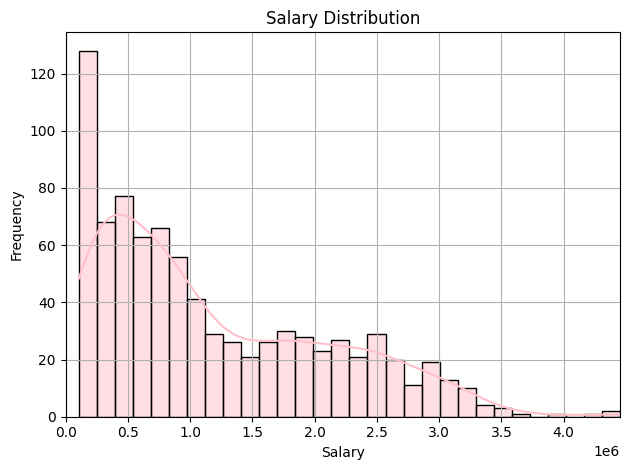

In [15]:
sns.histplot(data=df, x='SALARY', bins=30, kde=True, color='pink')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.xlim(0, df['SALARY'].max())
plt.grid(True)
plt.tight_layout()
plt.show()

This histogram illustrates the distribution of salaries, showing a right-skewed pattern where the majority of salaries are concentrated at the lower end of the spectrum, peaking significantly below 500,000 units (likely Rupiah, given the previous context), with a frequency exceeding 120 individuals. As salary levels increase, the frequency of individuals earning those amounts gradually decreases, although there are minor peaks or plateaus around the 2,000,000 and 2,500,000 ranges, indicating a smaller but consistent number of individuals in those higher income brackets, before tapering off significantly towards the extreme right tail, representing a very small number of high earners.